<a href="https://colab.research.google.com/github/ManuelGQuiroz/Procesamiento-y-clasificacion-de-datos/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import statsmodels.api as sm

## Preliminaries

In [ ]:
iris_data = load_iris()

In [ ]:
df= pd.DataFrame(data= np.c_[iris_data['data'], iris_data['target']],
                 columns= iris_data['feature_names'] + ['target'])

df['species'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


In [ ]:
df.rename(columns={'sepal length (cm)': 'sepal_length', 
                   'sepal width (cm)': "sepal_width",
                   'petal length (cm)': 'petal_length', 
                   'petal width (cm)': 'petal_width'}, inplace=True)

df

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


In [ ]:
iris = df.iloc[:,:4]
iris2 = iris.drop(['petal_length'], axis=1)
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:

Y = iris['petal_length']
X = iris[['sepal_length',
 'sepal_width',
 'petal_width']]
X = sm.add_constant(X)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Kitchen sink model

In [ ]:
ks = sm.OLS(Y, X)
ks_res =ks.fit()
ks_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           petal_length   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1473.
Date:                Fri, 24 Feb 2023   Prob (F-statistic):          6.98e-109
Time:                        04:55:19   Log-Likelihood:                -39.408
No. Observations:                 150   AIC:                             86.82
Df Residuals:                     146   BIC:                             98.86
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.2627      0.297     -0.883      0.379      -0.850       0.325
sepal_length     0.7291      0.058     12.502      0.000       0.614       0.844
sepal_width     -0.6460      0.068     -9.431      0.000      -0.781      -0.511
petal_width      1.4468      0.068     21.399      0.000       1.313       1.580
==============================================================================
Omnibus:                        2.520   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                2.391
Skew:                           0.073   Prob(JB):                        0.303
Kurtosis:                       3.601   Cond. No.                         79.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Using R-like formulas

In [ ]:
import statsmodels.formula.api as smf

ksf =  smf.ols(' petal_length ~ sepal_length + sepal_width + petal_width', data=iris)
ksf_res = ksf.fit()
ksf_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           petal_length   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1473.
Date:                Fri, 24 Feb 2023   Prob (F-statistic):          6.98e-109
Time:                        04:55:19   Log-Likelihood:                -39.408
No. Observations:                 150   AIC:                             86.82
Df Residuals:                     146   BIC:                             98.86
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.2627      0.297     -0.883      0.379      -0.850       0.325
sepal_length     0.7291      0.058     12.502      0.000       0.614       0.844
sepal_width     -0.6460      0.068     -9.431      0.000      -0.781      -0.511
petal_width      1.4468      0.068     21.399      0.000       1.313       1.580
==============================================================================
Omnibus:                        2.520   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                2.391
Skew:                           0.073   Prob(JB):                        0.303
Kurtosis:                       3.601   Cond. No.                         79.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Checking for colinearity

### Scatterplot matrix

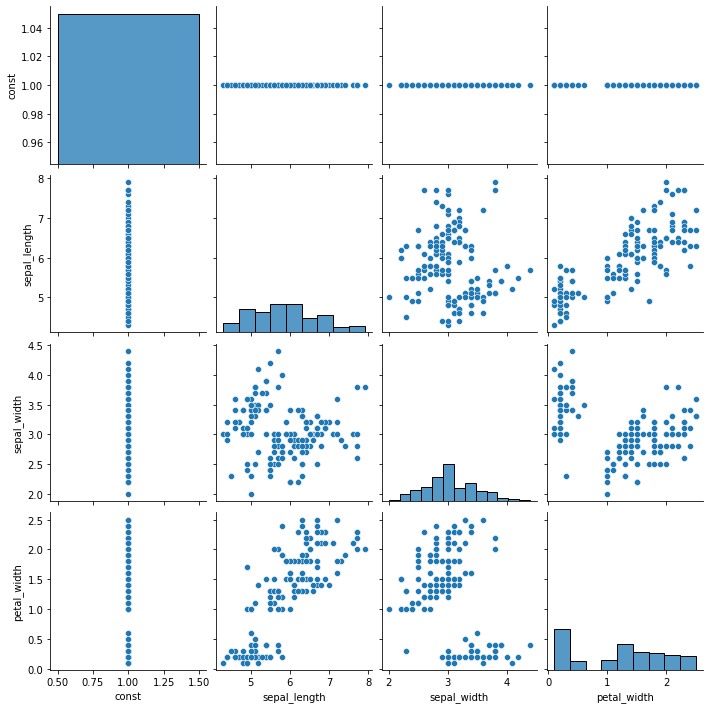

In [ ]:
sns.pairplot(X)

### Correlation matrix

In [ ]:
round(iris.corr(),2)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.12,0.87,0.82
sepal_width,-0.12,1.00,-0.43,-0.37
petal_length,0.87,-0.43,1.00,0.96
petal_width,0.82,-0.37,0.96,1.00


## Regression diagnostics

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


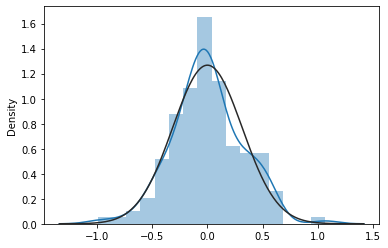

In [ ]:
from scipy import stats
sns.distplot(ksf_res.resid, fit=stats.norm);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

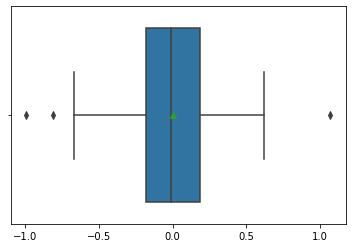

In [ ]:
sns.boxplot(ksf_res.resid, showmeans=True)

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


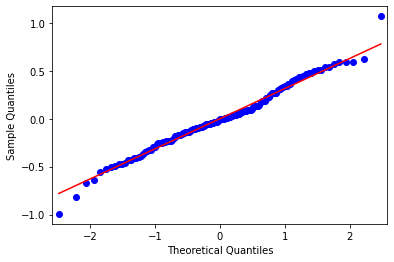

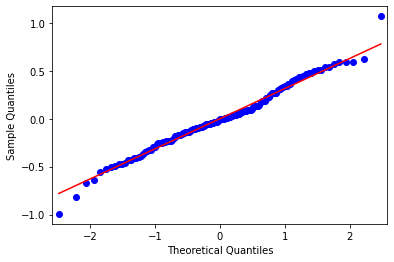

In [ ]:
sm.qqplot(ksf_res.resid, line='s')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


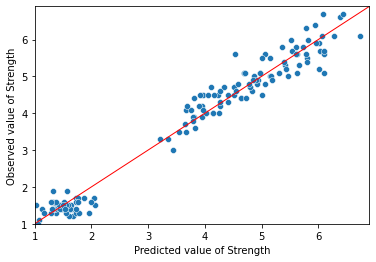

In [ ]:
Y_max = Y.max()
Y_min = Y.min()

ax = sns.scatterplot(ksf_res.fittedvalues, Y)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted value of Strength")
ax.set_ylabel("Observed value of Strength")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

## Standardized regression coefficients

### Creating standardized input matrices

In [ ]:
Y_norm = pd.Series(stats.zscore(Y), name=Y.name)
Y_norm.head(3)

0   -1.340227
1   -1.340227
2   -1.397064
Name: petal_length, dtype: float64

In [ ]:
X1_norm = iris2.loc[:, iris2.columns != "const"]
X1_norm = pd.DataFrame(stats.zscore(X1_norm))
X1_norm = sm.add_constant(X1_norm)
check = pd.concat([round(X1_norm.mean(axis=0), 5), round(X1_norm.std(axis=0, ddof=0), 5)], axis=1)
check.columns=["mean", "std dev"]
check

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,mean,std dev
const,1.0,0.0
sepal_length,-0.0,1.0
sepal_width,-0.0,1.0
petal_width,-0.0,1.0


### Running the standardized regression

In [ ]:
modstd = sm.OLS(Y_norm, X1_norm)
modstd_res = modstd.fit()
modstd_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           petal_length   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1473.
Date:                Fri, 24 Feb 2023   Prob (F-statistic):          6.98e-109
Time:                        04:55:29   Log-Likelihood:                 45.338
No. Observations:                 150   AIC:                            -82.68
Df Residuals:                     146   BIC:                            -70.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.585e-16      0.015  -1.75e-14      1.000      -0.029       0.029
sepal_length     0.3420      0.027     12.502      0.000       0.288       0.396
sepal_width     -0.1595      0.017     -9.431      0.000      -0.193      -0.126
petal_width      0.6247      0.029     21.399      0.000       0.567       0.682
==============================================================================
Omnibus:                        2.520   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.284   Jarque-Bera (JB):                2.391
Skew:                           0.073   Prob(JB):                        0.303
Kurtosis:                       3.601   Cond. No.                         3.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Tornado diagram

<AxesSubplot:>

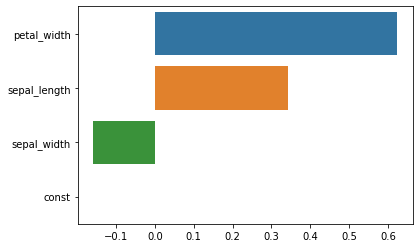

In [ ]:
coeff = modstd_res.params
coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]
sns.barplot(x=coeff.values, y=coeff.index, orient='h')

## Stepwise refinement: an aside

### Create a sklearn kitchen sink model

In [ ]:
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

mod = LinearRegression()
mod.fit(X,Y)

LinearRegression()

In [ ]:
coef = pd.concat([pd.Series(iris.columns), pd.Series(mod.coef_)], axis=1)
coef.columns=["variable", "coefficient"]
coef

,variable,coefficient
0,sepal_length,0.000000
1,sepal_width,0.729138
2,petal_length,-0.646012
3,petal_width,1.446793


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions = mod.predict(X)

print("MAE:", mean_absolute_error(Y, predictions))
print("MSE:",mean_squared_error(Y, predictions))
print("RMSE:",mean_squared_error(Y, predictions,squared=False))
print("R2:",r2_score(Y, predictions))

MAE: 0.24008457241575182
MSE: 0.09901965315142126
RMSE: 0.31467388380897016
R2: 0.9680117693912218
